<a href="https://colab.research.google.com/github/abhaygoel/PujaRegression/blob/main/Copy_of_002a_Multi_Linear_Regression_(EN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

# **Multi-Linear Regression using Python**

*by: Puja Goel*

---

This notebook is created to demonstrate multi-linear regression analysis by using Python. Regression analysis itself is a tool for building statistical models that characterize relationships among a dependent variable and one or more independent variables. **Simple Linear Regression** refers to the method used when there is only one independent variable, while **Multi-Linear Regression** refers to the method used when there is more than one independent variable. Multi-Linear Regression can be written as below:

<div align="center">
$\hat{y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k}$
</div>

*where:*

*$\hat{y}:$ dependent variable (predicted value)*

*$\beta_{0}:$ estimated intercept*

*$\beta_{k}X_{k}:$ estimated slope coefficient*

In this example we will try to use multi-linear regression to analyze the relationship of a product's price, advertisement cost, and the product sales number. We will also try to predict how much products will be sold given specific product's price and advertisement cost.

# Preparation

In the cell code below, we will load some Python libraries we will be using, such as Pandas, NumPy, matplotlib, sklearn, etc. We will also load our dataset from GitHub into a dataframe called `df_pie` by using the Pandas library.

In [15]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/abhaygoel/PujaRegression/refs/heads/main/FINAFACTORSPAEdit.csv',
                     index_col='S.No.', sep=',')

# Display dataset shape
print(f"Dataset shape: {df_pie.shape}")

# Select relevant columns
df_selected = df_pie.iloc[:, -7:-1].dropna() # Selecting last 8 columns, excluding last column
#df_selected = df_pie.iloc[:, -7:-1]
X = df_selected.iloc[:, :-1]  # Independent variables (6 columns)
y = df_selected.iloc[:, -1]   # Dependent variable (second last column)

# Print selected column names
print(f"Selected Independent Variables: {X.columns.tolist()}")
print(f"Dependent Variable: {y.name}")
df_selected

Dataset shape: (40, 11)
Selected Independent Variables: ['Succession Planning', 'Heir', 'Tenure of Resigning CEO', 'Incoming CEO Outsider/Insider', '% Shares of Promoters at the beginning of quarter']
Dependent Variable: DV: 3 DAY CAR


,Succession Planning,Heir,Tenure of Resigning CEO,Incoming CEO Outsider/Insider,% Shares of Promoters at the beginning of quarter,DV: 3 DAY CAR
S.No.,,,,,,
1,0,0,78,0,52.60,-0.062542
2,0,0,27,0,66.04,0.091400
3,1,1,67,1,50.38,0.012100
4,1,0,19,0,60.94,-0.217700
5,0,0,124,1,28.42,0.106300
6,1,0,35,0,38.74,0.091600
7,0,0,16,1,52.18,-0.351900
8,0,0,4,0,41.67,0.227500
9,1,0,18,0,62.72,-0.002700


As seen above our dataset consist of 3 columns (pie_sales, price, and advertising) and 15 rows. We will try to predict how much pie will be sold depending on its price and advertisement cost.

In [16]:
from scipy.stats import zscore

# Compute Z-scores for all numeric columns
z_scores = df_selected.apply(zscore)

# Identify rows with any Z-score > 3 or < -3
outliers = df_selected[(z_scores > 3) | (z_scores < -3)].dropna(how='all')

print("Outlier Rows (Z-Score Method):")
outliers


Outlier Rows (Z-Score Method):


,Succession Planning,Heir,Tenure of Resigning CEO,Incoming CEO Outsider/Insider,% Shares of Promoters at the beginning of quarter,DV: 3 DAY CAR
S.No.,,,,,,
3,NaN,1.0,NaN,NaN,NaN,NaN
33,NaN,1.0,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,-2.2756


# Descriptive Analysis

Before going deeper into using multi-linear regression, it's always a good idea to simply visualize our data to understand it better and see if there are any relationship between each variable. To do this we will use the `pairplot()` function from the Seaborn library. The function will output a figure containing histogram and scatter plot between each variable.

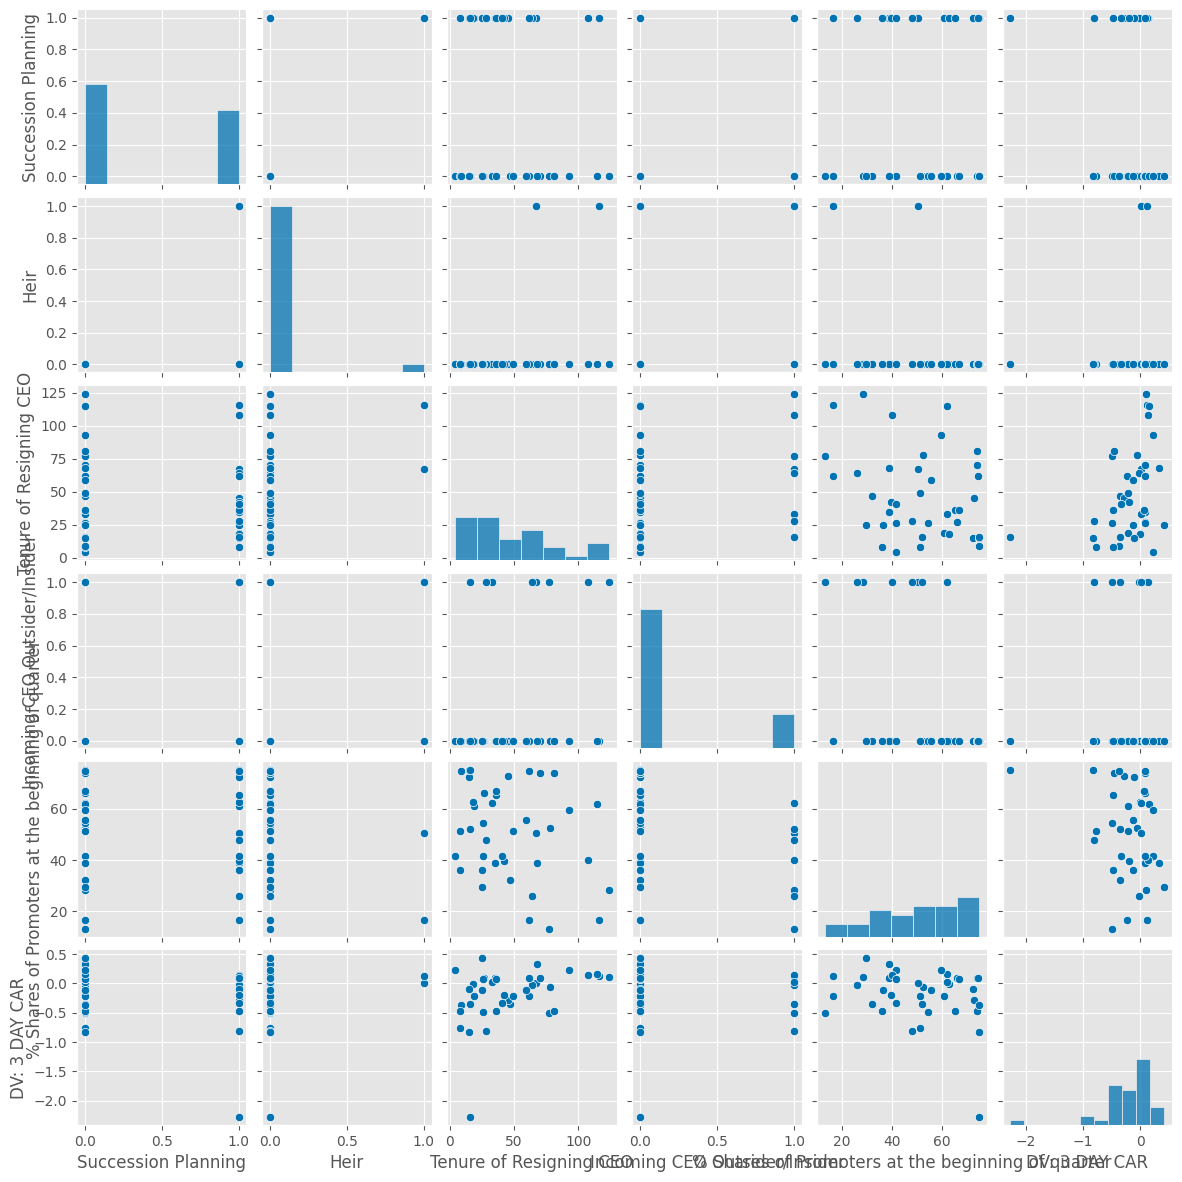

In [2]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_selected, height=2)

Looking at first row in the figures we can see that there might be relations between price, advertising, and pie_sales. The scatter plot between pie sales and price display pattern of negative relation, which means the higher the price the lower the sales will be. In the other hand the scatter plot between advertising and pie sales display a positive relation, the more money we spent on advertising the more pie we will sells.

# Building Regression Model

Since we already see that there might be relations between our independent and dependent variables, let's continue to building our regression model. We will use the `LinearRegression()` function from the sklearn library to build our models.

In [4]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -0.0743137102881968
Coefficients: [-0.14195318  0.11457304  0.00436942 -0.13409148 -0.00482903]


# Model Validation

After building the model it is important for us to validate it's performance. We can evaluate a model by looking at it's coefficient of determination ($R^2$), F-test, t-test, and also residuals. Before we continue we will rebuild our model using the statsmodel library with the `OLS()` function. Then we will print the model summary using the `summary()` function on the model. The model summary contains lots of important value we can use to evaluate our model.

## Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:

<div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>

In statsmodel we can obtain the $R^2$ value of our model by accesing the `.rsquared` attribute of the our model.

                            OLS Regression Results                            
Dep. Variable:          DV: 3 DAY CAR   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.664
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.170
Time:                        15:23:31   Log-Likelihood:                -20.391
No. Observations:                  40   AIC:                             52.78
Df Residuals:                      34   BIC:                             62.92
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

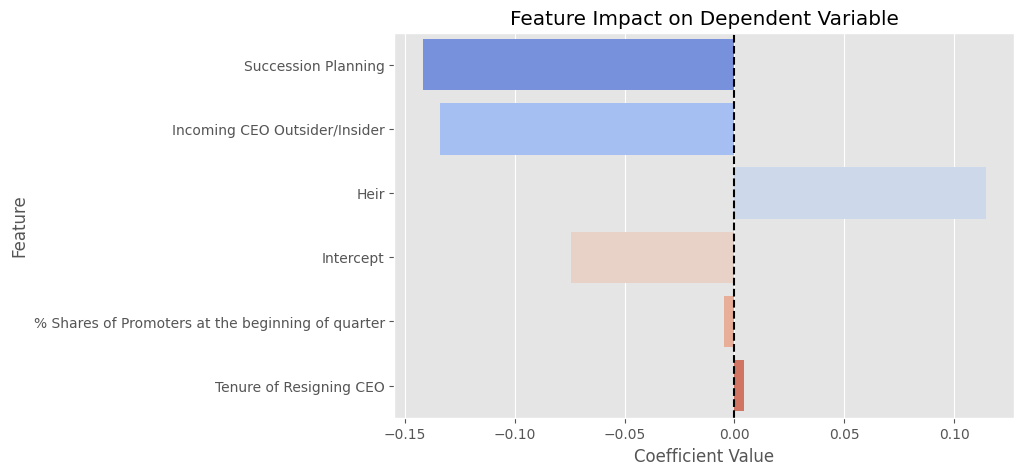

In [5]:
# Prepare data (all independent variables)
X = df_selected.iloc[:, :-1]  # Independent variables (6 columns)
Y = df_selected.iloc[:, -1]   # Dependent variable

# Train model using statsmodels
X_sm = sm.add_constant(X)  # Add intercept for statsmodels
model = sm.OLS(Y, X_sm).fit()  # Fit model
print(model.summary())

# Predict using statsmodels (on X_sm with intercept)
predicted = model.predict(X_sm)

# Evaluate model using R^2 score
r2 = model.rsquared  # R-squared value

# Feature Importance Analysis (Coefficients & P-values)
summary_table = model.summary().tables[1]
print("Feature Impact Analysis (Coefficients & P-Values):")
# print(summary_table)

# Sort features by absolute coefficient value
coeff_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns),
    'Coefficient': model.params.values,
    'P-Value': model.pvalues.values
})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display impact of independent variables
print("\nSorted Feature Importance (Higher Absolute Coefficients Indicate Greater Impact):")
print(coeff_df[['Feature', 'Coefficient', 'P-Value']])

# Visualize feature importance using bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y=coeff_df['Feature'], x=coeff_df['Coefficient'], palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Impact on Dependent Variable")
plt.show()



$R^2$ range between 0 and 1, where $R^2=0$ means there are no linear relationship between the variables and $R^2=1$ shows a perfect linear relationship. In our case, we got $R^2$ score about **xxxxx which means xx**.xx% of our dependent variable can be explained using our independent variables.



## F-test (ANOVA)

F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to $R^2$ score, we can easily get the F-statistic and probability of said F-statistic by accessing the `.fvalue` and `.f_pvalue` attribute of our model as below.

In [6]:
print('F-statistic:', model.fvalue)
print('Probability of observing value at least as high as F-statistic:', model.f_pvalue)

F-statistic: 1.664234593115984
Probability of observing value at least as high as F-statistic: 0.1699368529842088


Because our f_pvalue is lower than 0.05 **we can conclude that our model performs better than other simpler model.**

## T-test

The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model we have. We can also get the p-value for all of our variables by calling the `.pvalues` attribute on the model.

In [7]:
print(model.pvalues)

const                                                0.796247
Succession Planning                                  0.345266
Heir                                                 0.749090
Tenure of Resigning CEO                              0.078341
Incoming CEO Outsider/Insider                        0.475638
% Shares of Promoters at the beginning of quarter    0.262150
dtype: float64


Both of our independent variables, price and advertising, have p-value less than 0.05 which shows that **there is sufficient evidence that price and advertising affects our pie sales.**

## Assumption Testing

Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

1.   Linearity
2.   Normality
3.   Multicollinearity
4.   Autocorrelation
5.   Homoscedasticity

Residual is the difference between the observed value and predicted value from our dataset. With statsmodel we can easily get the residual value of our model by simply accesing the `.resid` attribute of the model and then we can keep it in a new column called 'residual' in our `df_pie` dataframe.

In [8]:
# Add residuals to dataframe
df_selected['Residual'] = model.resid
df_selected.head()

,Succession Planning,Heir,Tenure of Resigning CEO,Incoming CEO Outsider/Insider,% Shares of Promoters at the beginning of quarter,DV: 3 DAY CAR,Residual
S.No.,,,,,,,
1,0,0,78,0,52.60,-0.062542,-0.075036
2,0,0,27,0,66.04,0.091400,0.366649
3,1,1,67,1,50.38,0.012100,0.198421
4,1,0,19,0,60.94,-0.217700,0.209829
5,0,0,124,1,28.42,0.106300,-0.089861


### Linearity

This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

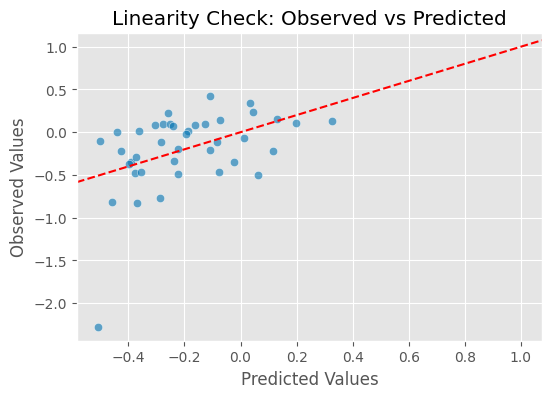

In [9]:
### 1. LINEARITY CHECK
# Scatter plot: Observed vs. Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=predicted, y=Y, alpha=0.6)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title("Linearity Check: Observed vs Predicted")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Line of perfect fit
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that **there is linear relationship between our independent and dependent variables.**

### Normality

This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. We will use the `normal_ad()` function from statsmodel to calculate our p-value and then compare it to threshold of 0.05, if the p-value we get is higher than the threshold then we can assume that our residual is normally distributed.

p-value from the Anderson-Darling test (p < 0.05 indicates non-normality): 0.006035509120685006


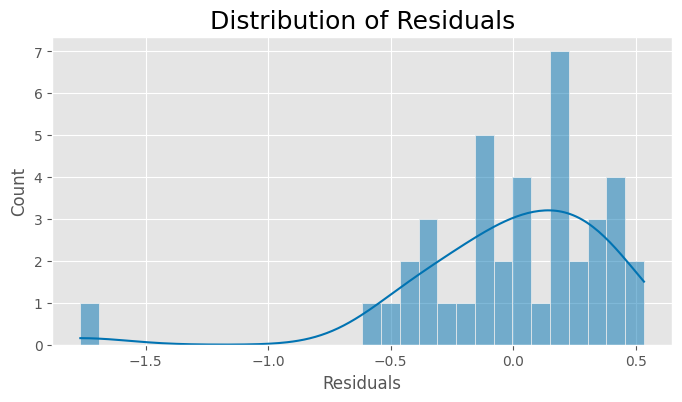

Residuals are NOT normally distributed


In [10]:
from statsmodels.stats.diagnostic import normal_ad

# Perform Anderson-Darling test on residuals
p_value = normal_ad(df_selected['Residual'])[1]
print('p-value from the Anderson-Darling test (p < 0.05 indicates non-normality):', p_value)

# Plot Residuals Distribution
plt.figure(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(df_selected['Residual'], kde=True, bins=30)  # Using histplot instead of distplot (deprecated)
plt.xlabel('Residuals')
plt.show()

# Reporting normality of residuals
if p_value < 0.05:
    print('Residuals are NOT normally distributed')
else:
    print('Residuals are normally distributed')


From the code above we got our p-value of 0.6644 which can be considered normal because it's above the 0.05 threshold. The histogram plot also show a normal distribution (despite it might be looking a little skewed because we only have 15 observation in our dataset). **From both of those result we can assume that our residual are normally distributed.**

### Multicollinearity

This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the `corr()` function from Pandas dataframe. Then we can display it as a heatmap using `heatmap()` function from Seaborn.

Pearson correlation coefficient matrix of selected variables:
                                                    Succession Planning  \
Succession Planning                                           1.000000   
Heir                                                          0.266847   
Tenure of Resigning CEO                                      -0.093336   
Incoming CEO Outsider/Insider                                 0.075858   
% Shares of Promoters at the beginning of quarter            -0.017765   
DV: 3 DAY CAR                                                -0.176235   

                                                       Heir  \
Succession Planning                                0.266847   
Heir                                               1.000000   
Tenure of Resigning CEO                            0.314223   
Incoming CEO Outsider/Insider                      0.172062   
% Shares of Promoters at the beginning of quarter -0.224614   
DV: 3 DAY CAR                           

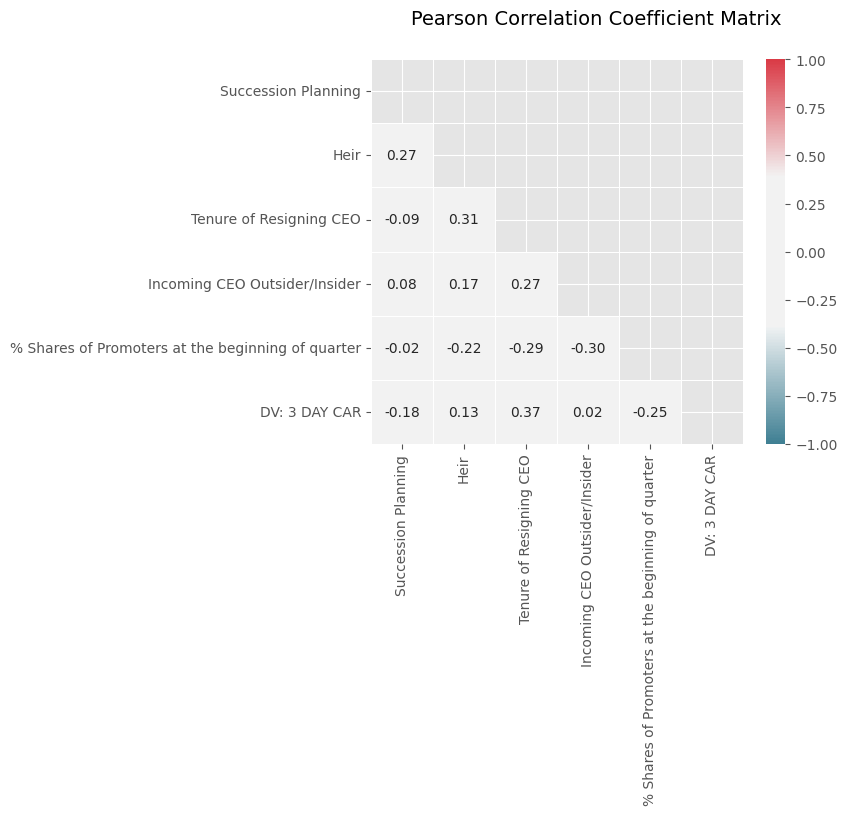

In [11]:
# Compute correlation matrix for all independent variables and dependent variable
corr = df_selected.iloc[:, -8:-1].corr()  # Selecting last 7 columns (6 independent + 1 dependent)
print('Pearson correlation coefficient matrix of selected variables:\n', corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))  # Use np.triu() to mask upper triangle

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", linewidths=0.5)

# Titles and labels
fig.suptitle('Pearson Correlation Coefficient Matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()


The image shows that there are some positive relationship between xxxxx and xxxxx and a negative relationship between xxxxx and xxxx. Both of this result support our resulting model from before. Most importanly, notice how the price and advertising have almost 0 correlation coefficient. **This means both of our independent variable are not affecting each other and that there is no multicollinearity in our data.**

### Autocorrelation

Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the `durbin_watson ()` function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

* If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
* If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
* If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [12]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_selected['Residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9753428890128635
Little to no autocorrelation 

Assumption satisfied


Our model got a Durbin-Watson score of about 1.975 which is between 1.5 and 2.5, **so we can assume that there is no autocorrelation in our residual.**

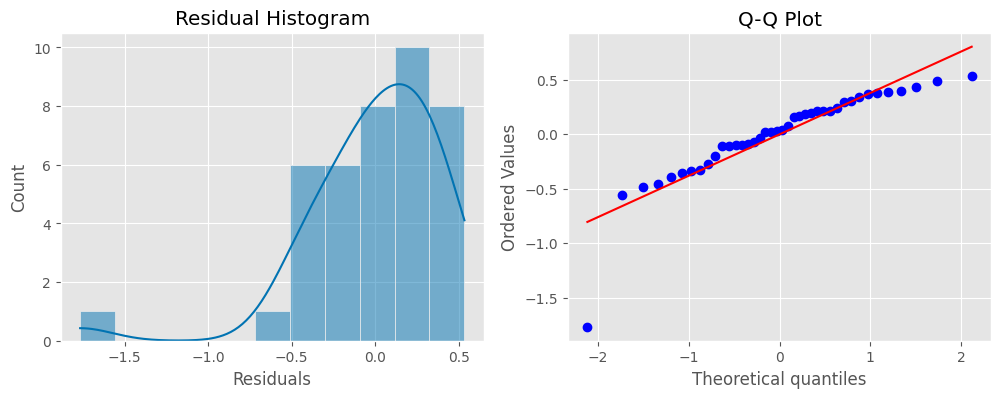

Shapiro-Wilk Test: p-value = 0.0000

Multicollinearity Check (Variance Inflation Factor - VIF):
                                             Feature        VIF
0                                          Intercept  17.082220
1                                Succession Planning   1.126106
2                                               Heir   1.256339
3                            Tenure of Resigning CEO   1.262813
4                      Incoming CEO Outsider/Insider   1.158286
5  % Shares of Promoters at the beginning of quarter   1.180320

Durbin-Watson Test for Autocorrelation: 1.9753

Homoscedasticity Check (Breusch-Pagan Test):
{'LM Statistic': np.float64(3.2466531698218803), 'LM p-value': np.float64(0.6620184278891478), 'F-Statistic': np.float64(0.6006865621462587), 'F p-value': np.float64(0.6996624062371308)}


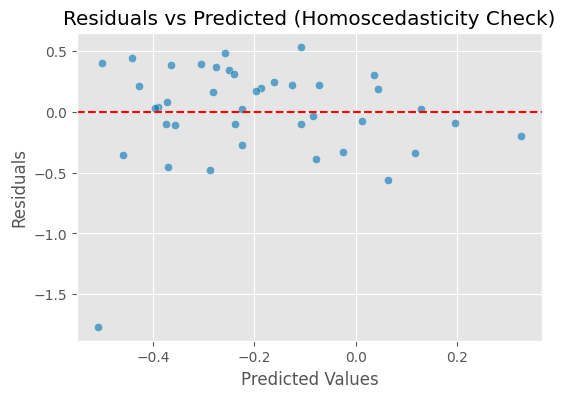

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2. NORMALITY CHECK OF RESIDUALS
# Histogram & Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of Residuals
sns.histplot(df_selected['Residual'], kde=True, ax=axes[0])
axes[0].set_title("Residual Histogram")
axes[0].set_xlabel("Residuals")

# Q-Q Plot
stats.probplot(df_selected['Residual'], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot")

plt.show()

# Shapiro-Wilk test (Normality Test)
shapiro_test = stats.shapiro(df_selected['Residual'])
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")

### 3. MULTICOLLINEARITY CHECK (VIF)
X_vif = sm.add_constant(X)  # Add constant
vif_data = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("\nMulticollinearity Check (Variance Inflation Factor - VIF):")
print(vif_data)

### 4. AUTOCORRELATION CHECK (DURBIN-WATSON TEST)
dw_test = sms.durbin_watson(df_selected['Residual'])
print(f"\nDurbin-Watson Test for Autocorrelation: {dw_test:.4f}")

### 5. HOMOSCEDASTICITY CHECK (Breusch-Pagan Test)
bp_test = sms.het_breuschpagan(df_selected['Residual'], X_sm)
labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
print("\nHomoscedasticity Check (Breusch-Pagan Test):")
print(dict(zip(labels, bp_test)))

# Residuals vs Predicted Scatter Plot (Check for Homoscedasticity)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=predicted, y=df_selected['Residual'], alpha=0.6)
plt.axhline(0, color='red', linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.show()

Testing with other Models since OLS doesnt seem to work


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/abhaygoel/PujaRegression/refs/heads/main/FINAFACTORSPAEdit.csv',
                     index_col='S.No.', sep=',')

# Display dataset shape
print(f"Dataset shape: {df_pie.shape}")

# Select relevant columns
df_selected = df_pie.iloc[:, -7:-1].dropna() # Selecting last 8 columns, excluding last column

# Define independent (X) and dependent (Y) variables
X = df_selected.iloc[:, :-1]  # Independent variables (6 columns)
y = df_selected.iloc[:, -1]   # Dependent variable (second last column)

# Optional: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print("Data successfully prepared!")

Dataset shape: (40, 11)
Data successfully prepared!


Decision Tree


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

# Predictions
tree_pred = tree_reg.predict(X_test)

# Evaluate
print("Decision Tree R² Score:", r2_score(Y_test, tree_pred))
print("MAE:", mean_absolute_error(Y_test, tree_pred))


Decision Tree R² Score: -0.3654675021619902
MAE: 0.249225


Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train)

# Predictions
rf_pred = rf_reg.predict(X_test)

# Evaluate
print("Random Forest R² Score:", r2_score(Y_test, rf_pred))
print("MAE:", mean_absolute_error(Y_test, rf_pred))


Random Forest R² Score: -0.5278770879477699
MAE: 0.29327294970874995


XGBoost

In [20]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_reg = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, Y_train)

# Predictions
xgb_pred = xgb_reg.predict(X_test)

# Evaluate
print("XGBoost R² Score:", r2_score(Y_test, xgb_pred))
print("MAE:", mean_absolute_error(Y_test, xgb_pred))


XGBoost R² Score: -0.6045971632196518
MAE: 0.27613653649333864


Model Comparison
Higher R² and lower MAE → better model performance!



In [25]:
models = {
    "Decision Tree": tree_reg,
    "Random Forest": rf_reg,
    "XGBoost": xgb_reg
}

for name, model in models.items():
    pred = model.predict(X_test)
    print(f"{name}: R² Score = {r2_score(Y_test, pred):.4f}, MAE = {mean_absolute_error(Y_test, pred):.4f}")


Decision Tree: R² Score = -0.3655, MAE = 0.2492
Random Forest: R² Score = -0.5279, MAE = 0.2933
XGBoost: R² Score = -0.6046, MAE = 0.2761


Which independent variables impact the model the most?

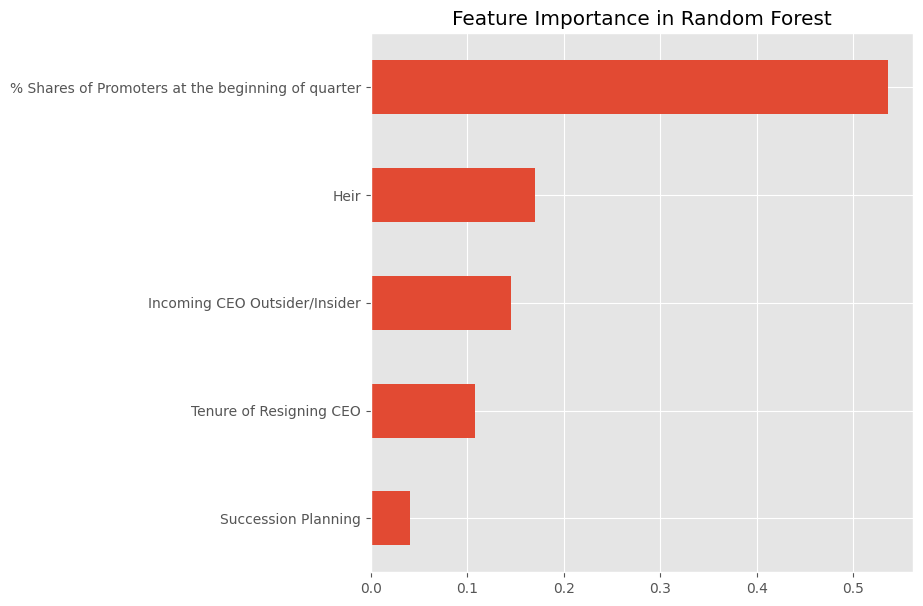

In [26]:
feature_importance = pd.Series(xgb_reg.feature_importances_, index=df_selected.columns[:-1])
feature_importance.sort_values().plot(kind='barh', title="Feature Importance in XGBoost")
plt.show()
